# deep learning 01 germantrafficsigns

In [118]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io import loadmat
import pickle

import os

In [119]:
path = '../ten-datasets/germantrafficsigns/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')

In [120]:
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [121]:
df.shape

(43, 2)

In [122]:
num_classes = df.shape[0]
num_classes

43

In [123]:
training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"


In [124]:
with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [125]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [126]:
print(X_train.shape)
# X_train
print(y_train.shape)

print(X_valid.shape)
# X_train
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


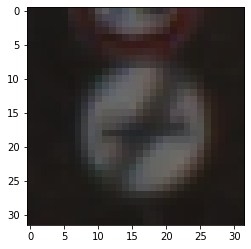

In [127]:
plt.imshow(X_train[0])

In [128]:
print(y_train.shape)
y_train

(34799,)


array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [129]:
print("Number of classes: {}".format(num_classes))
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Number of classes: 43
Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [130]:
# print(X_train[0])
X_train.shape

(34799, 32, 32, 3)

# Preprocess Data
## Shuffle the training data.


In [131]:
from sklearn.utils import shuffle
# print(X_train[0])

X_train, y_train = shuffle(X_train, y_train)
# print(X_train[0])



(34799, 32, 32, 3)

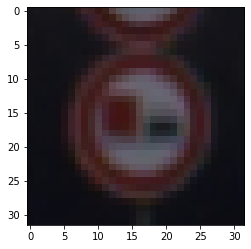

In [132]:
plt.imshow(X_train[0])
X_train.shape

# shallow learning
> svm 

>RandomForest


## svm

### gray img

In [133]:
import cv2

In [134]:
# def equi_hist(image):
#     image[:,:,0] = cv2.equalizeHist(image[:,:,0])
#     image[:,:,1] = cv2.equalizeHist(image[:,:,1])
#     image[:,:,2] = cv2.equalizeHist(image[:,:,2])
#     return image

In [135]:
# def grayscale(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     return img
#     img = grayscale(X_train[1000])
#     plt.imshow(img)
#     plt.axis("off")

# def equalize(img):
#     img = cv2.equalizeHist(img)
#     return img
#     img = equalize(img)
#     plt.imshow(img)
#     plt.axis("off")
#     print(img.shape)

# def preprocess(img):
#     img = grayscale(img)
#     img = equalize(img)
#     img = img/255
#     return img

In [136]:
# X_train_adv = np.array(list(map(preprocess, X_train)))
# X_test_adv = np.array(list(map(preprocess, X_test)))


In [137]:
# X_train_adv.shape

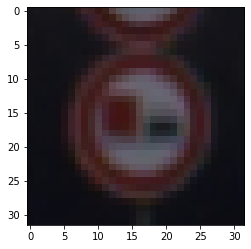

In [166]:
# plt.imshow(X_train_adv[0])
plt.imshow(X_train[0])


In [167]:
def preprocess_features(X, equalize_hist=True):
    # Convert from RGB to YUV
    X = np.array([np.expand_dims(cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)[:, :, 0], 2) for rgb_img in X])

    # adjust image contrast
    if equalize_hist:
        X = np.array([np.expand_dims(cv2.equalizeHist(img), 2) for img in X])

    X = np.float32(X)

    # Standardize features
    X -= np.mean(X, axis=0)
    X /= (np.std(X, axis=0) + np.finfo('float32').eps)

    return X

X_train_norm = preprocess_features(X_train)
X_test_norm = preprocess_features(X_test)


In [169]:
X_train_norm.shape

(34799, 32, 32, 1)

In [171]:
# X_train_norm[0]

# image processing

In [150]:
# from skimage import color


# # def augment_brightness_camera_images(image):
# #     image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
# #     image1 = np.array(image1, dtype = np.float64)
# #     random_bright = .5+np.random.uniform()
# #     image1[:,:,2] = image1[:,:,2]*random_bright
# #     image1[:,:,2][image1[:,:,2]>255]  = 255
# #     image1 = np.array(image1, dtype = np.uint8)
# #     image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
# #     return image1

# def img_preprop(image):
#     #image=image.squeeze()
#     image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# #     image_gauss = cv2.GaussianBlur(image_gray, (5,5), 20.0)
# #     image_sharp = cv2.addWeighted(image_gray, 2, image_gauss, -1, 0)
# #     return cv2.bitwise_not(image_sharp)
#     return image_gray

# def eq_Hist(img):
#     #Histogram Equalization
#     img2=img.copy() 
# #     img2 = cv2.equalizeHist(img)
#     #img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
#     #img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
#     return img2

# def gray_scale(x):
#     return eq_Hist(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))
# #     return cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

# #Bias 0.1 and range 0.1-0.9
# def normalise(x):
#     return (x/((255*.8))+.1)

    
# def preprocess_gray(data):
#     """Convert to grayscale, histogram equalize, and expand dims"""
#     gray_scale_images = []
#     for image in data:
#         gray = gray_scale(image)
#         #gray = augment_brightness_camera_images(data)
#         gray_scale_images.append(gray)
#     return np.array(gray_scale_images)    


In [151]:

# from numpy  import newaxis

# #Processing Training data

# X_train_pre = preprocess_gray(X_train)
# print("Training Data, After Gray scale shape:", X_train_pre.shape)
# # X_train_pre = X_train_pre[...,newaxis]
# X_train_pre = normalise(X_train_pre)
# print("After adding Axis:", X_train_pre.shape)

# # #Processing Testing data

# X_test_pre = preprocess_gray(X_test)
# print("Testing Data, After Gray scale shape:", X_test_pre.shape)
# # X_test_pre = X_test_pre[...,newaxis]
# X_test_pre = normalise(X_test_pre)
# print("After adding Axis:", X_test_pre.shape)

# #Processing Validation Data
# X_valid_pre = preprocess_gray(X_valid)
# print("Validation Data, After Gray scale shape:", X_valid_pre.shape)
# # X_valid_pre = X_valid_pre[...,newaxis]
# X_valid_pre = normalise(X_valid_pre)

# print("After adding Axis:", X_valid_pre.shape)

Training Data, After Gray scale shape: (34799, 32, 32)
After adding Axis: (34799, 32, 32)
Testing Data, After Gray scale shape: (12630, 32, 32)
After adding Axis: (12630, 32, 32)
Validation Data, After Gray scale shape: (4410, 32, 32)
After adding Axis: (4410, 32, 32)


In [97]:
# X_train[0]
# X_train_pre[0]

In [172]:
X_train_adv = X_train_norm.copy()
X_test_adv = X_test_norm.copy()

In [173]:
X_train_adv.shape

(34799, 32, 32, 1)

In [180]:
a = [[11,22],[33,44,55]]

In [181]:
len(a)

2

In [184]:
to_2_dim(a)

AttributeError: 'list' object has no attribute 'reshape'

In [179]:
len(X_test_adv)

12630

In [185]:
def to_2_dim(X_org):
    print(X_org.shape)
    X_size = len(X_org)
    TwoDim_X = X_org.reshape(X_size,-1)
    print(TwoDim_X.shape)
    return TwoDim_X


In [174]:
%%time
# TwoDim_X_train= to_2_dim(X_train)


(34799, 32, 32, 1)
(34799, 1024)
CPU times: user 896 µs, sys: 1.85 ms, total: 2.74 ms
Wall time: 39.6 ms


In [175]:
TwoDim_X_train_adv= to_2_dim(X_train_adv)

(34799, 32, 32, 1)
(34799, 1024)


In [176]:
# TwoDim_X_test = to_2_dim(X_test)
TwoDim_X_test_adv = to_2_dim(X_test_adv)

(12630, 32, 32, 1)
(12630, 1024)


### pca 

pca.components_ (365, 1024)
pca_var_ratio (365,)


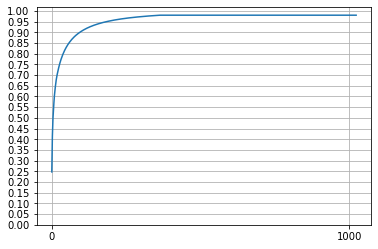

CPU times: user 14.5 s, sys: 483 ms, total: 15 s
Wall time: 4.6 s


In [178]:
%%time

from sklearn.decomposition import PCA

# X= TwoDim_X_train
X= TwoDim_X_train_adv
y=y_train
# pca=PCA( )
pca=PCA(n_components=0.98)
pca.fit(X,y)
ratio=pca.explained_variance_ratio_
print("pca.components_",pca.components_.shape)
print("pca_var_ratio",pca.explained_variance_ratio_.shape)
#绘制图形
plt.plot([i for i in range(X.shape[1])],
         [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
plt.xticks(np.arange(X.shape[1],step=1000))
plt.yticks(np.arange(0,1.01,0.05))
plt.grid()
plt.show()
# ratio

In [106]:
%%time

target_dim = ratio.shape[0]
target_dim 
# target_dim = pca.explained_variance_ratio_[0]
pca_target=PCA(n_components=target_dim)
# reduced_X_train = pca_target.fit_transform(TwoDim_X_train)
reduced_X_train = pca_target.fit_transform(TwoDim_X_train_adv)
reduced_X_train.shape

CPU times: user 13.5 s, sys: 597 ms, total: 14.1 s
Wall time: 3.93 s


(34799, 98)

In [107]:
def pca(TwoDim_X):
    target_dim = ratio.shape[0]
    pca_target=PCA(n_components=target_dim)
    reduced_X = pca_target.fit_transform(TwoDim_X)
    print(reduced_X.shape )
    return reduced_X

In [108]:
# reduced_X_test = pca(TwoDim_X_test)
reduced_X_test = pca(TwoDim_X_test_adv)

(12630, 98)


In [109]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [110]:
%%time

svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm.fit(reduced_X_train, y_train)
# svm.fit(TwoDim_X_train_adv, y_train)

CPU times: user 9min 30s, sys: 8.51 s, total: 9min 39s
Wall time: 9min 52s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [111]:
%%time
y_train_predict = svm.predict_proba(reduced_X_train).argmax(axis = 1)
# y_train_predict = svm.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("Logistic Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_train_predict

Logistic Train Accuracy: 0.960
CPU times: user 2min 21s, sys: 2.24 s, total: 2min 23s
Wall time: 2min 25s


array([13, 33, 34, ...,  9, 35, 42])

In [112]:
%%time

y_test_predict = svm.predict_proba(reduced_X_test).argmax(axis = 1)
# y_test_predict = svm.predict_proba(X_test_adv).argmax(axis = 1)
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.145
CPU times: user 51.6 s, sys: 992 ms, total: 52.6 s
Wall time: 54.6 s


In [113]:
accuracy = accuracy_score(y_train.flatten(),y_train_predict)
print(accuracy)

0.9602862151211242


In [114]:
accuracy = accuracy_score(y_test.flatten(),y_test_predict)
print(accuracy)

0.14520981789390341


## Random Forrest


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
%%time

forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=50,
                                n_estimators = 500, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
# forest.fit(TwoDim_X_train,y_train)
# forest.fit(TwoDim_X_train_adv,y_train)
forest.fit(reduced_X_train,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   45.4s finished


CPU times: user 4min 19s, sys: 3.24 s, total: 4min 22s
Wall time: 51.5 s


0.44179430443403545

In [92]:
%%time
# y_train_predict = forest.predict_proba(TwoDim_X_train).argmax(axis = 1)
# y_train_predict = forest.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
y_train_predict = forest.predict_proba(reduced_X_train).argmax(axis = 1)
print ("Logistic Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_train_predict

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.6s


Logistic Train Accuracy: 0.677
CPU times: user 14.1 s, sys: 1.25 s, total: 15.4 s
Wall time: 4.43 s


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    4.1s finished


array([ 4, 16,  4, ..., 18,  8,  1])

In [93]:
# TwoDim_X_train_adv.shape
# y_test_predict.shape

(12630,)

In [99]:
%%time

# y_test_predict = svm.predict_proba(TwoDim_X_test).argmax(axis = 1)
# y_test_predict = svm.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
y_test_predict = svm.predict_proba(reduced_X_test).argmax(axis = 1)
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.145
CPU times: user 52.6 s, sys: 1.09 s, total: 53.7 s
Wall time: 55.1 s


In [95]:
accuracy = accuracy_score(y_train,y_train_predict)
print(accuracy)

0.6772608408287595


In [96]:
# %%time

# predicted_classes = forest.predict(TwoDim_X_train)
# # predicted_classes = svm.predict(reduced_X)

# accuracy = accuracy_score(y_train.flatten(),predicted_classes)
# # parameters = forest.coef_
# print(accuracy)

# deep learning

## CNN

In [107]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [108]:
batch_size = 128
num_classes = 43 # 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 #28, 28

# the data, shuffled and split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(K.image_data_format()) # Explains explictly the function 
print('x_train shape:', X_train.shape)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

channels_last
x_train shape: (34799, 32, 32, 3)
X_train shape: (34799, 32, 32, 3)
34799 train samples
12630 test samples


### model

In [109]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
________________________________________________

In [110]:
%%time

hist = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 34799 samples, validate on 12630 samples
Epoch 1/5
34799/34799 [==============================] - 105s 3ms/step - loss: 1.5086 - accuracy: 0.5930 - val_loss: 0.4821 - val_accuracy: 0.8709
Epoch 2/5
34799/34799 [==============================] - 104s 3ms/step - loss: 0.3326 - accuracy: 0.9047 - val_loss: 0.3073 - val_accuracy: 0.9187
Epoch 3/5
34799/34799 [==============================] - 107s 3ms/step - loss: 0.1783 - accuracy: 0.9490 - val_loss: 0.2490 - val_accuracy: 0.9350
Epoch 4/5
34799/34799 [==============================] - 108s 3ms/step - loss: 0.1256 - accuracy: 0.9641 - val_loss: 0.2133 - val_accuracy: 0.9473
Epoch 5/5
34799/34799 [==============================] - 118s 3ms/step - loss: 0.0930 - accuracy: 0.9733 - val_loss: 0.2145 - val_accuracy: 0.9465
Test loss: 0.2144626517350227
Test accuracy: 0.9464766383171082
CPU times: user 32min 49s, sys: 8min 7s, total: 40min 56s
Wall time: 9min 13s


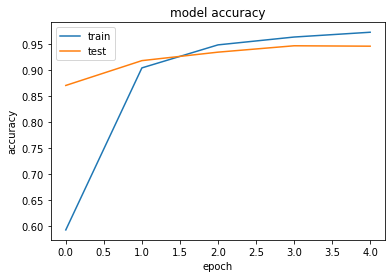

In [129]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [150]:
predictions = model.predict(X_test) #X_test, y_test

In [151]:
predictions[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [152]:
y_test[2]

38

## DBN
